<a href="https://colab.research.google.com/github/yugawala/shakyo/blob/main/%E3%82%B9%E3%83%A9%E3%82%B9%E3%83%A9%E3%82%8F%E3%81%8B%E3%82%8B%E3%83%99%E3%82%A4%E3%82%BA%E6%8E%A8%E8%AB%96%E5%86%99%E7%B5%8C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2章

In [14]:
import pymc as pm
import arviz as az

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import japanize_matplotlib

## ベルヌーイ分布
くじ引きにおいて、それぞれの試行であたる確率

In [3]:
p = 0.5

model = pm.Model()
with model:
  x = pm.Bernoulli('x', p=p)

In [4]:
with model:
  prior_samples1 = pm.sample_prior_predictive(random_seed=42)

Sampling: [x]


In [5]:
x_samples1 = prior_samples1['prior']['x'].values
print(x_samples1)

[[1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1
  0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0
  0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1
  1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
  1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1
  0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1
  1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1
  0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1
  1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0
  1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0
  1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1
  0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0
  1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1
  0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 

In [7]:
summary1 = az.summary(prior_samples1)
display(summary1)

arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,0.512,0.5,0.0,1.0,0.03,0.021,279.0,279.0,NaN


Text(0.5, 1.0, 'ベルヌーイ分布 p=0.5の事前分布')

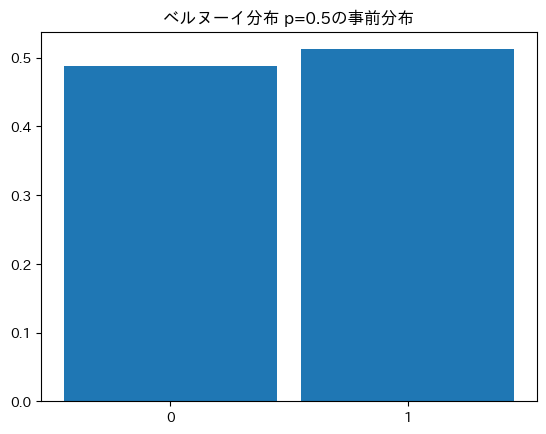

In [9]:
ax = az.plot_dist(x_samples1)
ax.set_title(f'ベルヌーイ分布 p={p}の事前分布')

## 二項分布
くじ引きn回の試行で何回あたるか
試行回数が無限に近づけば中心極限定理により正規分布となる

In [10]:
p = 0.5
n = 5

model2 = pm.Model()
with model2:
  x = pm.Binomial('x', n=n, p=p)

Sampling: [x]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


[[4 4 4 2 4 1 5 3 1 2 3 1 2 4 2 1 4 0 3 3 1 2 3 4 1 3 1 3 3 3 2 3 1 3 3 3
  0 4 3 1 2 4 3 1 3 3 2 1 1 3 3 2 2 4 4 3 4 3 4 3 5 4 3 2 3 3 3 1 1 2 1 2
  1 1 3 3 2 3 3 4 1 1 3 3 2 2 2 2 3 3 2 2 1 3 2 0 3 4 2 2 2 3 2 4 4 4 1 4
  5 3 1 4 3 3 1 3 3 2 2 3 2 3 3 4 4 1 3 3 4 3 3 4 3 5 3 3 3 2 4 3 3 2 3 3
  3 4 1 4 2 4 3 1 4 4 3 4 2 3 5 2 0 3 2 2 2 3 0 0 2 1 2 4 1 2 3 2 3 3 3 3
  2 1 3 2 2 4 2 3 3 2 2 2 1 3 1 1 3 2 3 1 3 4 3 2 2 2 2 1 2 2 2 4 4 2 2 4
  3 2 3 2 0 3 3 4 3 3 4 2 3 3 2 3 3 1 4 3 1 3 2 4 4 3 4 1 5 2 3 2 2 3 3 4
  2 1 2 4 2 2 3 1 3 3 4 2 2 4 2 2 2 4 2 1 3 2 4 2 2 3 1 2 1 2 1 4 3 5 1 3
  3 2 1 4 2 1 1 2 3 4 2 3 1 3 5 3 2 3 2 2 1 4 3 4 4 3 3 2 2 1 2 2 2 3 4 1
  3 2 3 1 4 2 1 3 3 1 2 3 2 1 1 2 1 2 2 2 2 5 2 2 1 2 4 4 3 3 1 2 5 3 3 2
  4 2 4 2 0 4 2 1 3 2 3 2 1 1 3 1 3 3 2 3 3 2 1 1 1 4 3 3 2 1 2 2 5 2 3 3
  2 1 2 4 2 4 2 2 0 3 2 2 3 1 1 4 3 3 4 4 3 4 1 5 4 3 3 5 3 4 3 3 2 2 3 2
  4 1 1 2 3 3 4 2 2 2 2 3 2 2 4 2 0 2 3 1 2 2 3 4 3 3 3 1 4 0 4 4 2 2 1 4
  1 3 2 0 0 3 2 2 3 3 4 4 2 1 2 3 2 2 

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,2.522,1.103,1.0,4.0,0.061,0.044,330.0,533.0,NaN


Text(0.5, 1.0, '二項分布 n=5, p=0.5の事前分布')

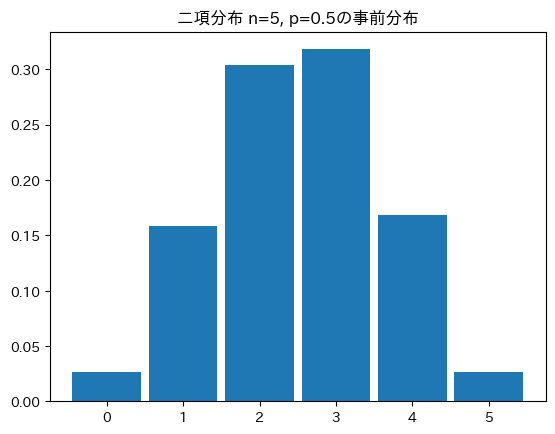

In [11]:
with model2:
  prior_samples2 = pm.sample_prior_predictive(random_seed=42)

x_samples2 = prior_samples2['prior']['x'].values
print(x_samples2)

summary2 = az.summary(prior_samples2)
display(summary2)

ax = az.plot_dist(x_samples2)
ax.set_title(f'二項分布 n={n}, p={p}の事前分布')

Sampling: [x]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


[[30 30 29 23 31 22 34 27 21 24 26 22 23 30 25 20 30 17 27 25 22 24 28 29
  20 26 21 26 27 28 23 26 20 26 28 27 18 29 27 19 22 29 26 21 27 28 23 19
  20 25 25 22 24 31 29 26 31 26 29 27 32 30 26 24 27 25 26 20 19 23 20 24
  19 21 26 25 25 28 26 28 20 20 27 26 22 24 24 25 25 26 25 22 20 27 24 18
  26 29 24 23 24 27 22 28 29 30 19 30 32 28 19 28 26 26 22 27 25 24 25 27
  23 26 27 30 30 20 28 26 28 26 27 30 26 32 28 26 27 23 31 27 26 23 28 26
  25 29 20 28 25 30 27 20 29 28 26 30 23 28 32 24 18 27 24 24 23 25 17 16
  24 20 25 30 21 24 26 22 27 27 28 26 23 21 25 24 22 30 23 26 26 22 24 24
  21 26 21 21 26 22 28 19 27 31 26 24 23 22 24 20 24 25 22 29 28 22 23 30
  27 25 28 23 17 25 26 31 28 27 29 24 27 26 24 25 27 22 29 25 20 26 23 29
  30 27 29 21 32 22 26 23 22 27 27 29 25 20 22 29 23 24 25 20 27 25 28 23
  24 31 22 24 24 29 25 22 26 25 28 25 24 27 21 22 22 24 19 29 27 34 19 26
  26 24 19 30 25 20 21 25 27 32 25 26 19 26 34 28 24 25 25 25 19 29 26 28
  28 27 26 25 23 21 24 24 22 25 30 22 

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,24.998,3.456,18.0,30.0,0.176,0.129,374.0,493.0,NaN


Text(0.5, 1.0, '二項分布 n=50, p=0.5の事前分布')

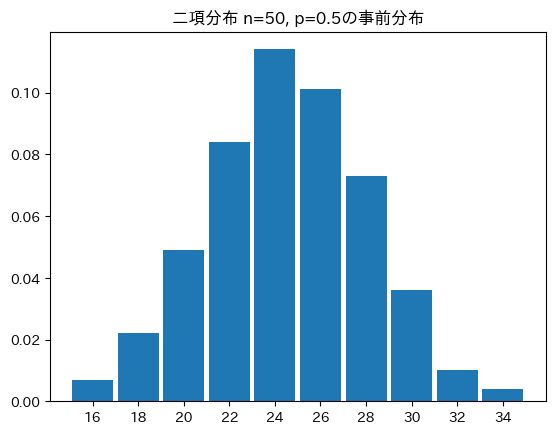

In [12]:
p = 0.5
n = 50

model3 = pm.Model()
with model3:
  x = pm.Binomial('x', n=n, p=p)
  prior_samples3 = pm.sample_prior_predictive(random_seed=42)

x_samples3 = prior_samples3['prior']['x'].values
print(x_samples3)

summary3 = az.summary(prior_samples3)
display(summary3)

ax = az.plot_dist(x_samples3)
ax.set_title(f'二項分布 n={n}, p={p}の事前分布')

## 正規分布

([<matplotlib.axis.XTick at 0x28a29a2d0>,
 [Text(4.0, 0, '4.0'),
  Text(4.2, 0, '4.2'),
  Text(4.4, 0, '4.4'),
  Text(4.6000000000000005, 0, '4.6'),
  Text(4.800000000000001, 0, '4.8'),
  Text(5.000000000000001, 0, '5.0'),
  Text(5.200000000000001, 0, '5.2'),
  Text(5.400000000000001, 0, '5.4'),
  Text(5.600000000000001, 0, '5.6'),
  Text(5.800000000000002, 0, '5.8'),
  Text(6.000000000000002, 0, '6.0')])

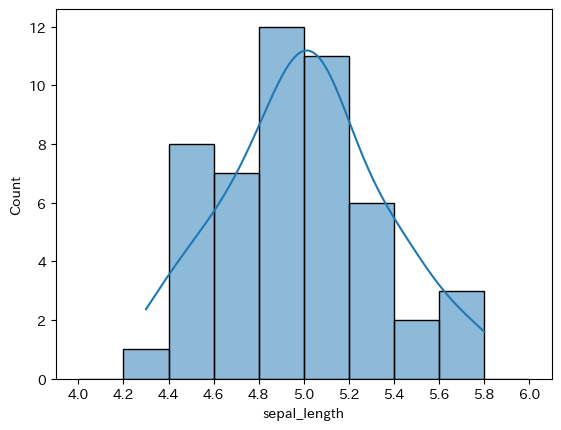

In [16]:
df = sns.load_dataset('iris')
df1 = df[df['species'] == 'setosa']

bins = np.arange(4.0, 6.2, 0.2)

sns.histplot(df1['sepal_length'], bins=bins, kde=True)
plt.xticks(bins)

Sampling: [x]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


[[ 0.41832997  0.60557617  0.02878786 -1.084246    1.46422098  0.29072736
  -1.33075642 -0.03472346  0.28041847  0.10749307 -1.92080086  1.57864499
   1.00595719  0.45121505 -0.59343367  0.09382112  1.85195867 -0.25590475
  -0.28298637  0.415816   -1.08877401 -1.96729165  0.88737846 -1.32823784
  -0.13157981 -0.36196929  0.7820311   0.28266399 -1.00595013  0.01851214
  -1.24315953  2.60337585  0.15139223 -0.51553062 -0.2196374   0.40234591
   1.36128828  0.74287737  0.93685218  0.17547031  1.52520418  0.09821447
  -1.16490357  0.52358791 -1.06559789 -0.31079113  0.5559524  -0.09963476
  -0.25769078 -1.58951869 -1.81491229  0.53617305  1.27138979 -0.55403891
   1.72433064 -0.31178569  0.06331837  1.38212765  0.58472813 -0.50975014
   0.2513335   0.40621724  0.8656376  -0.53392518 -0.03877829  1.14263416
  -0.46350628  2.26692259 -0.5287392   0.32461586 -0.1544165  -0.81960771
  -1.20293573  0.09544837 -1.3617434   0.27737016  0.30665917 -1.40419209
  -1.53897176  1.59692719  1.26835706 

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,0.009,0.963,-1.59,1.9,0.047,0.033,428.0,414.0,NaN


Text(0.5, 1.0, '正規分布 μ=0.0, σ=1.0の事前分布')

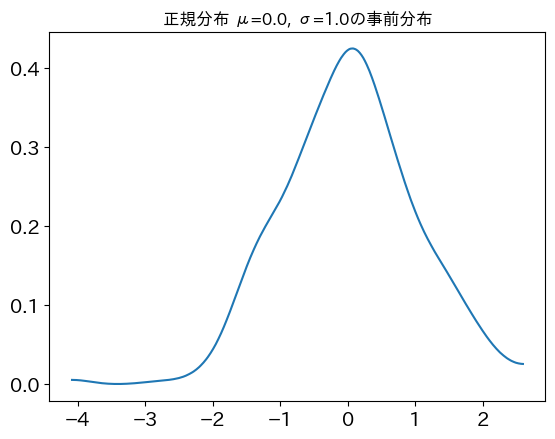

In [19]:
mu = 0.0
sigma = 1.0

model4 = pm.Model()

with model4:
  x = pm.Normal('x', mu=mu, sigma=sigma)
  prior_samples4 = pm.sample_prior_predictive(random_seed=42)

x_samples4 = prior_samples4['prior']['x'].values
print(x_samples4[:, :100])

summary4 = az.summary(prior_samples4)
display(summary4)

ax = az.plot_dist(x_samples4)
ax.set_title(f'正規分布 μ={mu}, σ={sigma}の事前分布')

## 一様分布
連続値において、どの値も等確率で出現する

Sampling: [x]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


[[0.91674416 0.91098667 0.8765925  0.30931841 0.95465607 0.17509458
  0.99662814 0.75203348 0.15038118 0.38334205 0.57929755 0.17545841
  0.24936317 0.92789618 0.45043938 0.08049801 0.92897428 0.0145879
  0.74506917 0.50817951 0.16114111 0.42722995 0.80989887 0.85133696
  0.06946216 0.57816756 0.13495204 0.55863526 0.72404236 0.77635178
  0.31264508 0.62936681 0.07600455 0.61244242 0.76271682 0.66850046
  0.01788179 0.89393369 0.68119886 0.05815091 0.21322457 0.88236378
  0.62095282 0.13583653 0.72843457 0.78909839 0.31787272 0.03725282
  0.07792079 0.50836923 0.51707609 0.22624359 0.34760498 0.9562864
  0.8728551  0.57262446 0.95135519 0.65216825 0.88258962 0.69665684
  0.98336328 0.92885887 0.64555302 0.40866512 0.70908829 0.55270282
  0.62742591 0.07837106 0.04155039 0.24832439 0.067527   0.38937433
  0.03959853 0.10557087 0.61048682 0.51127382 0.48346119 0.76838016
  0.63992093 0.82725158 0.0802972  0.0715233  0.73349723 0.56197244
  0.19509539 0.41326536 0.39160485 0.45042795 0.50

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,0.502,0.289,0.037,0.956,0.015,0.012,362.0,474.0,NaN


Text(0.5, 1.0, '一様分布 lower=0.0, upper=1.0の事前分布')

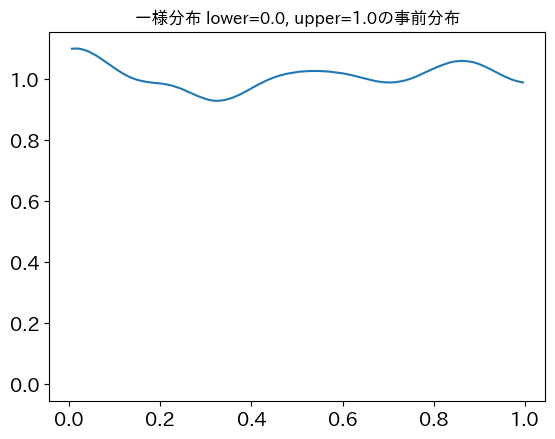

In [22]:
lower = 0.0
upper = 1.0

model6 = pm.Model()

with model6:
  x = pm.Uniform('x', lower=lower, upper=upper)
  prior_samples6 = pm.sample_prior_predictive(random_seed=42)

x_samples6 = prior_samples6['prior']['x'].values
print(x_samples6[:, :100])

summary6 = az.summary(prior_samples6)
display(summary6)

ax = az.plot_dist(x_samples6)
ax.set_title(f'一様分布 lower={lower}, upper={upper}の事前分布')

Text(0.5, 1.0, '一様分布 lower=0.0, upper=1.0の事前分布')

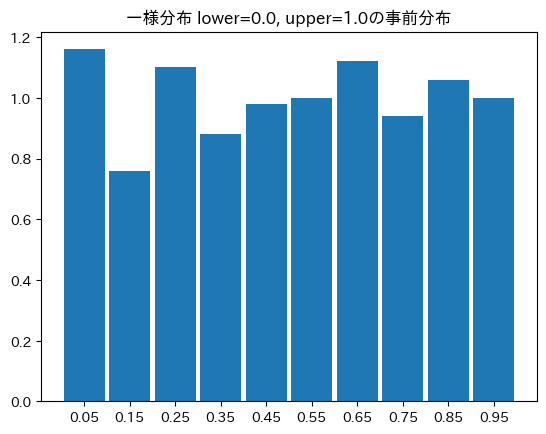

In [21]:
bins = np.arange(0.0, 1.1, 0.1)
ax = az.plot_dist(x_samples6, kind='hist', hist_kwargs={'bins': bins})
ax.set_title(f'一様分布 lower={lower}, upper={upper}の事前分布')

## ベータ分布
確率値を目的変数とした確率分布

Text(0, 0.5, '尤度')

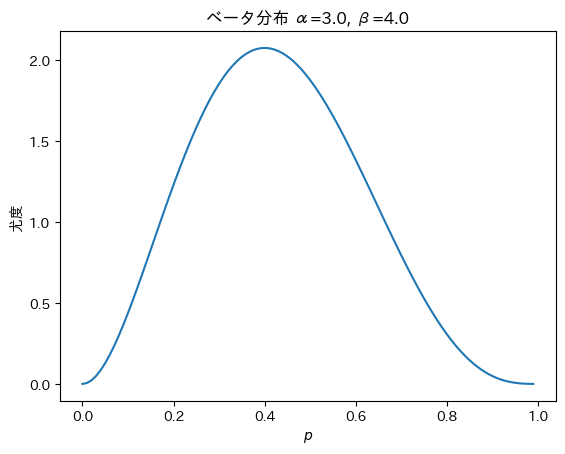

In [23]:
from math import gamma

alpha = 2.0 + 1.0
beta = 3.0 + 1.0

def Beta(p, alpha, beta):
  C = gamma(alpha + beta - 1) / (gamma(alpha - 1) * gamma(beta - 1))
  return C * p**(alpha - 1) * (1 - p)**(beta - 1)

p = np.arange(0.0, 1.0, 0.01)


plt.plot(p, Beta(p, alpha, beta))
plt.title(f'ベータ分布 α={alpha}, β={beta}')
plt.xlabel(r'$p$')
plt.ylabel('尤度')

Sampling: [x]


[[0.47810686 0.77844182 0.74451879 0.63851978 0.68891656 0.18191653
  0.31366816 0.43134204 0.47247866 0.49097759 0.76396861 0.20892371
  0.65893497 0.39801626 0.36106818 0.35676278 0.47753711 0.35908552
  0.4128828  0.68980539 0.76777851 0.47933876 0.2372802  0.15365419
  0.28630036 0.58293151 0.23093505 0.49224802 0.24837311 0.54873933
  0.37705104 0.43517663 0.63504575 0.45683045 0.68972524 0.56305255
  0.23745316 0.72427288 0.54018219 0.14068328 0.48874495 0.59364496
  0.47963674 0.21833518 0.31594381 0.73603573 0.24569626 0.08720277
  0.44745565 0.53201452 0.36199453 0.20267042 0.18945374 0.30017016
  0.21926062 0.57638301 0.30893057 0.38056641 0.66953246 0.19560578
  0.28389317 0.35122419 0.38597621 0.69091371 0.54946882 0.5357716
  0.44049528 0.41225119 0.50055203 0.80755198 0.52816239 0.36019269
  0.48544934 0.37435732 0.58793769 0.26573523 0.66157753 0.4687999
  0.62033278 0.29929357 0.8402134  0.28446085 0.67201397 0.73445346
  0.324377   0.32648633 0.51586496 0.22100987 0.72

Text(0.5, 1.0, 'ベータ分布 α=3.0, β=4.0の事前分布')

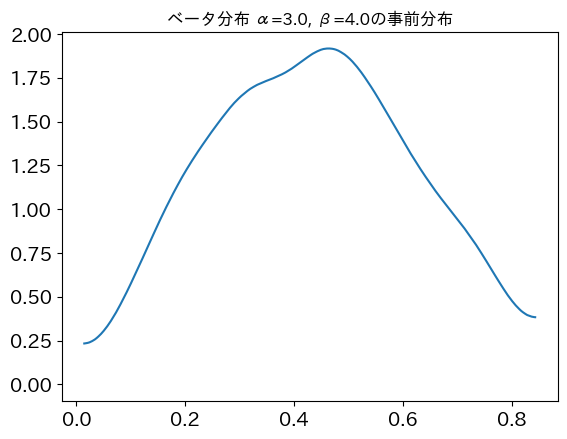

In [25]:
model8 = pm.Model()

with model8:
  x = pm.Beta('x', alpha=alpha, beta=beta)
  prior_samples8 = pm.sample_prior_predictive(random_seed=42)

x_samples8 = prior_samples8['prior']['x'].values
print(x_samples8[:, :100])

ax = az.plot_dist(x_samples8)
ax.set_title(f'ベータ分布 α={alpha}, β={beta}の事前分布')

Text(0.5, 1.0, 'ベータ分布 α=3.0, β=4.0の事前分布')

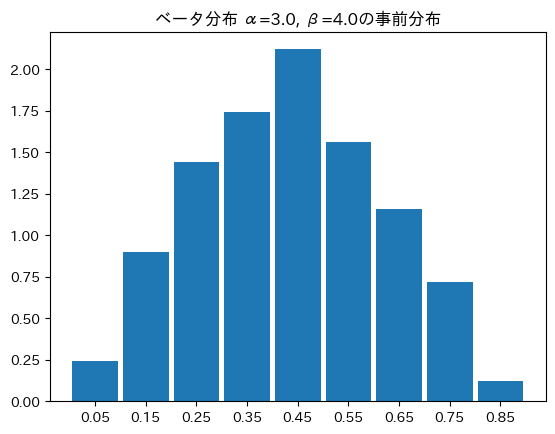

In [26]:
bins = np.arange(0.0, 1.0, 0.1)
ax = az.plot_dist(x_samples8, kind='hist', hist_kwargs={'bins': bins})
ax.set_title(f'ベータ分布 α={alpha}, β={beta}の事前分布')

In [28]:
alpha/(alpha + beta) # ベータ分布の平均値・ピークはこの値になる

0.42857142857142855

In [29]:
summary8 = az.summary(prior_samples8)
display(summary8)

arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,0.433,0.181,0.12,0.76,0.008,0.006,462.0,362.0,NaN


## 半正規分布
正規分布の正の値をとる場合のみの分布。
事前分布として用いられる

Sampling: [x]


[[0.41832997 0.60557617 0.02878786 1.084246   1.46422098 0.29072736
  1.33075642 0.03472346 0.28041847 0.10749307 1.92080086 1.57864499
  1.00595719 0.45121505 0.59343367 0.09382112 1.85195867 0.25590475
  0.28298637 0.415816   1.08877401 1.96729165 0.88737846 1.32823784
  0.13157981 0.36196929 0.7820311  0.28266399 1.00595013 0.01851214
  1.24315953 2.60337585 0.15139223 0.51553062 0.2196374  0.40234591
  1.36128828 0.74287737 0.93685218 0.17547031 1.52520418 0.09821447
  1.16490357 0.52358791 1.06559789 0.31079113 0.5559524  0.09963476
  0.25769078 1.58951869 1.81491229 0.53617305 1.27138979 0.55403891
  1.72433064 0.31178569 0.06331837 1.38212765 0.58472813 0.50975014
  0.2513335  0.40621724 0.8656376  0.53392518 0.03877829 1.14263416
  0.46350628 2.26692259 0.5287392  0.32461586 0.1544165  0.81960771
  1.20293573 0.09544837 1.3617434  0.27737016 0.30665917 1.40419209
  1.53897176 1.59692719 1.26835706 0.74444453 1.37903328 0.37289418
  0.22521904 0.7968999  0.19003288 0.40520818 1.

Text(0.5, 1.0, '半正規分布 σ=1.0の事前分布')

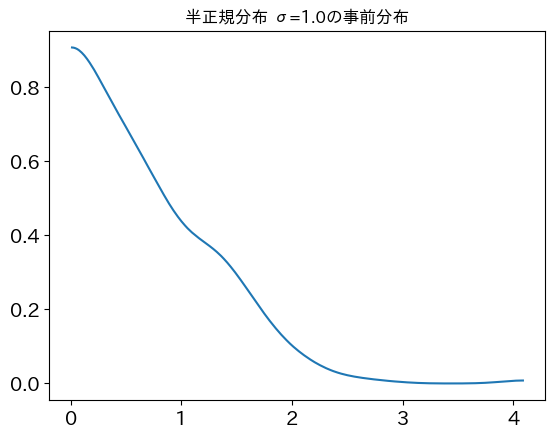

In [31]:
# mu = 0 の制約が半世紀分布には前提として存在
sigma = 1.0

model10 = pm.Model()

with model10:
  x = pm.HalfNormal('x', sigma=sigma)
  prior_samples10 = pm.sample_prior_predictive(random_seed=42)

x_samples10 = prior_samples10['prior']['x'].values
print(x_samples10[:, :100])

ax = az.plot_dist(x_samples10)
ax.set_title(f'半正規分布 σ={sigma}の事前分布')